# A Regressão Logística
- É um modelo linear para **classificação** usando uma função dada por:
<img src="https://drive.google.com/uc?id=1YXiCkxBJ0vf8WQRjLgiw6uI-Xp2T56cZ" style='width: 300px;' />
- Onde, **para calcular s, vamos usar os mesmos conceitos que falamos na regressão linear (coef, intercept)**
<br><br>
- Na regressão logística, ao invés de determinar um valor binário para a classe (0 ou 1, maça ou banana, fraude ou não), ela retorna **a probabilidade de um evento ocorrer**
    - Como ele calcula probabilidades, é muito usado em problemas de classificação de crédito, previsão de saída de clientes (churn) e até probabilidade de doenças
<br><br>
- Considerando uma única variável (petal width (cm)) para fazer a previsão do dataset iris (que já falamos), podemos visualizar primeiramente os dados e então traçar essa função logística
<img src="https://drive.google.com/uc?id=1aSA66H2y8tiS2oVDz05BHgUhM218DcnL" style='width: 600px;' />
- Com isso, podemos fazer a previsão para qualquer novo valor
<img src="https://drive.google.com/uc?id=1lIvPbsn2PD0fPe-6m-HZnItzVh_gM0Oj" style='width: 2000px;' />

- **Para começar, podemos já usar o dataset iris**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [1]:
# Importando o dataset
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True, as_frame=True)

In [2]:
# Considerando apenas a coluna 'petal width (cm)' e os targets 0 e 1
X = X.loc[y.isin([0,1]),'petal width (cm)'].values
y = y[y.isin([0,1])].values

- E separar em treino e teste
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Visualizando graficamente a relação do petal width (cm) com a classe
    - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

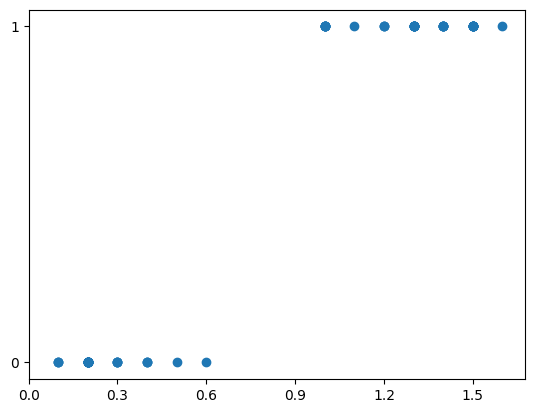

In [4]:
# Visualizando graficamente
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train, y_train)

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

- **Utilizando a regressão logística**
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [5]:
# Importando a regressão logística
from sklearn.linear_model import LogisticRegression

In [6]:
# Criando o nosso classificador
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), y_train)

In [7]:
# Verificando o coeficiente angular
w1 = clf.coef_[0][0]

In [8]:
# E o coeficiente linear
w0 = clf.intercept_[0]

- Para traçar esse gráfico, já temos a função `expit` do scipy
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html
    - `expit(x) = 1/(1+exp(-x))`

In [9]:
# Importando o expit
from scipy.special import expit

In [11]:
# Importando o numpy e criando um array de 0 a 2
import numpy as np
valores_x = np.linspace(X_train.min(),X_train.max(),100)
valores_x

array([0.1       , 0.11515152, 0.13030303, 0.14545455, 0.16060606,
       0.17575758, 0.19090909, 0.20606061, 0.22121212, 0.23636364,
       0.25151515, 0.26666667, 0.28181818, 0.2969697 , 0.31212121,
       0.32727273, 0.34242424, 0.35757576, 0.37272727, 0.38787879,
       0.4030303 , 0.41818182, 0.43333333, 0.44848485, 0.46363636,
       0.47878788, 0.49393939, 0.50909091, 0.52424242, 0.53939394,
       0.55454545, 0.56969697, 0.58484848, 0.6       , 0.61515152,
       0.63030303, 0.64545455, 0.66060606, 0.67575758, 0.69090909,
       0.70606061, 0.72121212, 0.73636364, 0.75151515, 0.76666667,
       0.78181818, 0.7969697 , 0.81212121, 0.82727273, 0.84242424,
       0.85757576, 0.87272727, 0.88787879, 0.9030303 , 0.91818182,
       0.93333333, 0.94848485, 0.96363636, 0.97878788, 0.99393939,
       1.00909091, 1.02424242, 1.03939394, 1.05454545, 1.06969697,
       1.08484848, 1.1       , 1.11515152, 1.13030303, 1.14545455,
       1.16060606, 1.17575758, 1.19090909, 1.20606061, 1.22121

- Para o caso binário, podemos calcular a curva em função do coef_ e do intercept_ fazendo `expit(x*w1+w0)`
    - https://scikit-learn.org/stable/modules/linear_model.html#binary-case

In [12]:
# Calculando o valor para cada valor de y
valores_y = expit(w1*valores_x+w0)

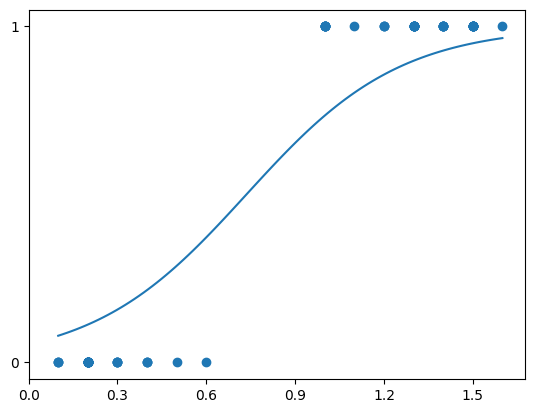

In [13]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x,valores_y)

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [14]:
# Podemos exibir os dados de treino em cima dessa curva
y_curva = expit(w1*X_train+w0)

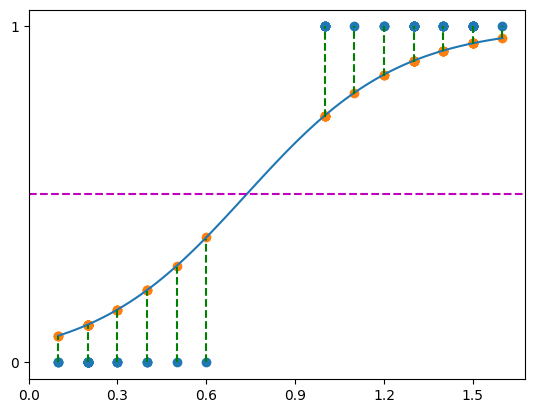

In [15]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x,valores_y)
ax.scatter(X_train, y_curva)

ax.axhline(y=0.5,c='m',linestyle='--')

ax.plot([0.1,0.1],[0,0.07883025],'--g')
ax.plot([0.2,0.2],[0,0.11156652],'--g')
ax.plot([0.3,0.3],[0,0.15560101],'--g')
ax.plot([0.4,0.4],[0,0.21285167],'--g')
ax.plot([0.5,0.5],[0,0.28408003],'--g')
ax.plot([0.6,0.6],[0,0.36800066],'--g')
ax.plot([1,1],[0.72972574,1],'--g')
ax.plot([1.1,1.1],[0.79846697,1],'--g')
ax.plot([1.2,1.2],[0.85324086,1],'--g')
ax.plot([1.3,1.3],[0.89508404,1],'--g')
ax.plot([1.4,1.4],[0.92603135,1],'--g')
ax.plot([1.5,1.5],[0.94837655,1],'--g')
ax.plot([1.6,1.6],[0.96423221,1],'--g')

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [16]:
# Fazendo a previsão das probabilidades
clf.predict_proba(X_train.reshape(-1,1))[0:5]

array([[0.88722677, 0.11277323],
       [0.26530467, 0.73469533],
       [0.78455262, 0.21544738],
       [0.05000239, 0.94999761],
       [0.07180909, 0.92819091]])

In [17]:
# Verificando o X_train
X_train[0:5]

array([0.2, 1. , 0.4, 1.5, 1.4])

In [18]:
# e o y_train
y_train[0:5]

array([0, 1, 0, 1, 1])

- **Utilizando essa previsão na base de teste**

In [19]:
# Verificando a previsão da probabilidade
y_pred = clf.predict_proba(X_test.reshape(-1,1))

In [20]:
y_pred[:,1]

array([0.96542879, 0.89789616, 0.98369551, 0.15741893, 0.21544738,
       0.11277323, 0.11277323, 0.8027766 , 0.11277323, 0.11277323,
       0.15741893, 0.11277323, 0.85679257, 0.11277323, 0.85679257,
       0.11277323, 0.92819091, 0.97621699, 0.07959343, 0.21544738,
       0.89789616, 0.89789616, 0.21544738, 0.11277323, 0.8027766 ,
       0.21544738, 0.15741893, 0.89789616, 0.07959343, 0.94999761,
       0.11277323, 0.11277323, 0.96542879])

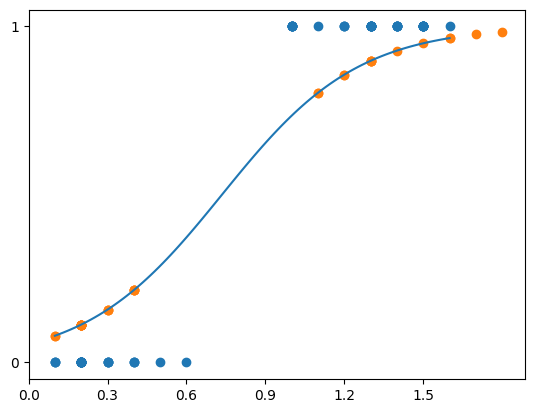

In [21]:
# Verificando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x,valores_y)
ax.scatter(X_test,y_pred[:,1])

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [22]:
# E apenas a previsão
y_pred_valor = clf.predict(X_test.reshape(-1,1))

In [23]:
# Avaliando o erro
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_valor)

array([[19,  0],
       [ 0, 14]])

- **O caso binomial pode ser estendido para quantas classses quisermos, porém há um aumento na complexidade**
    - https://scikit-learn.org/stable/modules/linear_model.html#binary-case
- **Podemos considerar todos as classes e todas as colunas**

In [24]:
# Importando novamente o dataset
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True, as_frame=True)

In [25]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# Criando novamente o classificador
clf2 = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)

In [27]:
# Verificando o coef_
clf2.coef_

array([[-0.38854874,  0.85385235, -2.2449296 , -0.95238246],
       [ 0.43789157, -0.36134207, -0.12373816, -0.77276803],
       [-0.04934283, -0.49251029,  2.36866776,  1.72515049]])

In [28]:
# e o intercept
clf2.intercept_

array([  8.69399193,   2.12547208, -10.81946401])

In [29]:
# Fazendo a previsão das classes
y_pred2 = clf2.predict(X_test)

In [30]:
# Avaliando o erro
confusion_matrix(y_test,y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])